In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mvexperiment.experiment as experiment
import ipywidgets as widgets
from ipyfilechooser import FileChooser
%matplotlib inline

In [2]:
fc = FileChooser('./')
display(fc)

FileChooser(path='D:\git\NanoPrepare', filename='', title='', show_hidden=False, select_desc='Select', change_…

In [3]:
exp = experiment.Chiaro(fc.value)
exp.open()

5.5


In [4]:
f = open(fc.value,'r')
for line in f:
    if line[:8]=='Time (s)':
        break
com = line.split('\t')
n=[0,com.index('Load (uN)'),com.index('Piezo (nm)')]
time=[]
load=[]
z=[]
for line in f:
    cols = line.split('\t')
    time.append(float(cols[n[0]]))
    load.append(float(cols[n[1]]))
    z.append(float(cols[n[2]]))
time=np.array(time)
z=np.array(z)
load=np.array(load)
f.close()

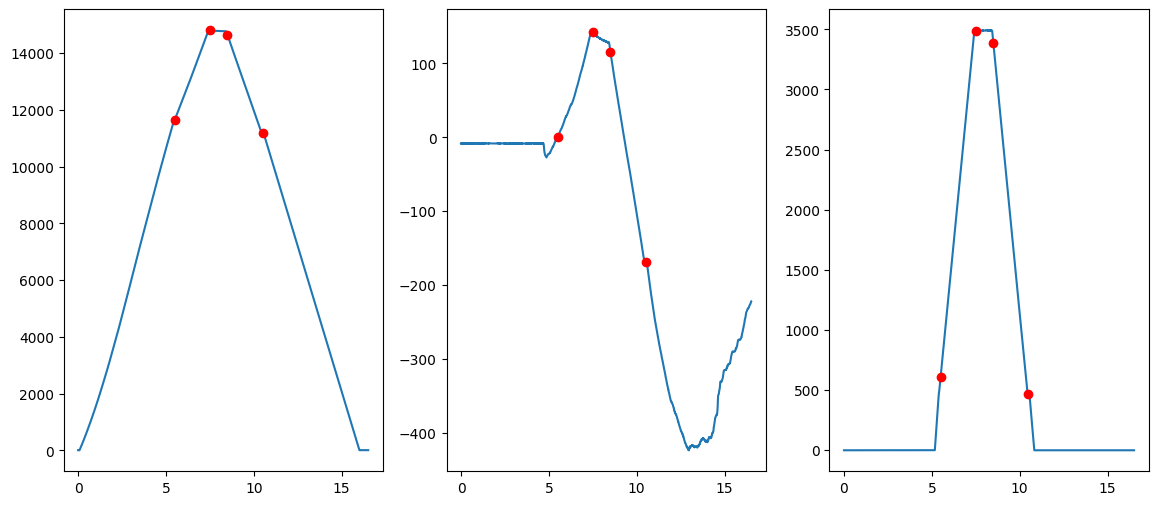

In [26]:
fig,ax=plt.subplots(1,3,figsize=(14,6))

def pl(value,ax):
    offset = 0 
    ax.plot(exp.data['time'],exp.data[value])
    for i in exp.nodi:
        ax.plot(exp.data['time'][i+offset],exp.data[value][i+offset],'ro')

pl('z',ax[0])
pl('force',ax[1])
pl('indentation',ax[2])
